# Laboratorio 8

**Nombre:** Martín Sebastian Alomoto Rivera

**Tema:** Trabajo en Clase.

**Fecha:** 16 01 2026.

## Ejercicio 1:

1.- Implementar los algoritmos de Newton-Cotes simple y compuesto para hallar:

$$
\int_0^{\pi}e^{- \frac{x^2}{2}}dx \approx 1.2512081...
$$

y registrar el comportamiento del error teórico y práctico con esta integral. Hacerlo para $n=10,20,50,100$. Dar conclusiones acerca de los errores.

La forma de la función es:

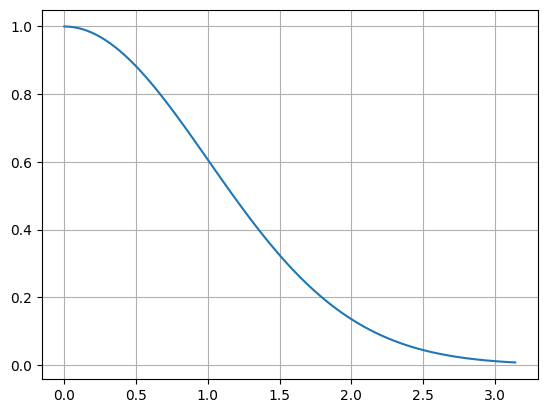

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return(np.exp(-(x**2)/2))
    
ejex = np.linspace(0,np.pi,100)
ejey = f(ejex)

plt.plot(ejex,ejey)
plt.grid(True)

a= 0
b= np.pi

Para empezar, hallemos el valor exacto de la integral utilizando una función (Black-Box) de la librería Scipy:

In [44]:
from scipy.integrate import quad

I_exact, error_estimado = quad(f, a, b)

print(f"Valor de referencia calculado (Scipy): {I_exact:.15f}")
print(f"Estimación del error del método de referencia: {error_estimado:.2e}")

Valor de referencia calculado (Scipy): 1.251208173095769
Estimación del error del método de referencia: 1.39e-14


Procedamos con la implementación de los algoritmos de Newton-Cotes compuesto tomando n =1,2 (Trapecio y Simpson respectivamente):

**a) Regla del Trapecio Compuesta($T_n$):**
Aproxima la función con polinomios de grado 1 (líneas rectas).
$$T_n = \frac{h}{2} \left[ f(x_0) + 2 \sum_{i=1}^{n-1} f(x_i) + f(x_n) \right]$$

$$E_{T, comp} = -\frac{(b-a)}{12} h^2 f''(\mu)$$

**b) Regla de Simpson Compuesta ($S_n$):**
Requiere que $n$ sea par. Aproxima la función con polinomios de grado 2 (parábolas).
$$S_n = \frac{h}{3} \left[ f(x_0) + 4 \sum_{i=1, i \text{ impar}}^{n-1} f(x_i) + 2 \sum_{i=2, i \text{ par}}^{n-2} f(x_i) + f(x_n) \right]$$
$$E_{S, comp} = -\frac{(b-a)}{180} h^4 f^{(4)}(\mu)$$

## 1. Análisis de Derivadas para el Error Teórico

Dada la función $f(x) = e^{-x^2/2}$ en el intervalo $[0, \pi]$, las derivadas necesarias para las cotas de error de Newton-Cotes son:

### a) Segunda Derivada (Cota para Trapecio)
$$f'(x) = -x e^{-x^2/2}$$
$$f''(x) = (x^2 - 1) e^{-x^2/2}$$

Para hallar el máximo de $|f''(x)|$ en $[0, \pi]$, evaluamos los puntos críticos de $f''$ y los extremos del intervalo:
1. **Extremos:** - $|f''(0)| = |(0-1)e^0| = 1$
   - $|f''(\pi)| = |(\pi^2 - 1)e^{-\pi^2/2}| \approx |(8.87)(0.007)| \approx 0.06$
2. **Puntos Críticos:** Derivando $f''(x)$ e igualando a cero obtenemos $x(3-x^2)=0$, es decir $x = \sqrt{3}$.
   - $|f''(\sqrt{3})| = |(3-1)e^{-3/2}| = 2e^{-1.5} \approx 0.446$

**Cota de la segunda derivada:** $\max_{x \in [0, \pi]} |f''(x)| = M_2 = 1.0$ (en $x=0$).

### b) Cuarta Derivada (Cota para Simpson)
$$f^{(4)}(x) = (x^4 - 6x^2 + 3) e^{-x^2/2}$$

Evaluamos los valores absolutos en los puntos clave del intervalo:
1. **Extremos:**
   - $|f^{(4)}(0)| = |(0 - 0 + 3)e^0| = 3$
   - $|f^{(4)}(\pi)| \approx |(\pi^4 - 6\pi^2 + 3)e^{-\pi^2/2}| \approx |(97.4 - 59.2 + 3)(0.007)| \approx 0.28$
2. **Puntos Críticos:** Al analizar la función, el valor máximo absoluto se mantiene en el origen.

**Cota de la cuarta derivada:** $\max_{x \in [0, \pi]} |f^{(4)}(x)| = M_4 = 3.0$ (en $x=0$).

In [45]:
# --- Implementación de Reglas Compuestas ---
def composite_trapezoid(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    return (h / 2) * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])

def composite_simpson(f, a, b, n):
    if n % 2 != 0:
        raise ValueError("Simpson requiere n par")
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    return (h / 3) * (y[0] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-2:2]) + y[-1])

In [46]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Definición de la función
def f(x):
    return np.exp(-x**2 / 2)

# Parámetros del problema
a, b = 0, np.pi
ns = np.array([10, 20, 50, 100]) # Convertir a array para operaciones directas
M2 = 1.0  # Máximo de |f''| hallado analíticamente
M4 = 3.0  # Máximo de |f(4)| hallado analíticamente

# Valor exacto (Referencia práctica de alta precisión)
I_exact, _ = quad(f, a, b, epsabs=1e-14)

# Contenedores para resultados
resultados = []

# Listas para la gráfica
h_values = (b - a) / ns
err_p_t_list = []
err_t_t_list = []
err_p_s_list = []
err_t_s_list = []

for n in ns:
    h = (b - a) / n
    
    # --- Regla del Trapecio Compuesta ---
    aprox_t = composite_trapezoid(f, a, b, n)
    err_p_t = abs(aprox_t - I_exact)
    err_t_t = ((b - a) / 12) * (h**2) * M2
    
    # --- Regla de Simpson Compuesta ---
    aprox_s = composite_simpson(f, a, b, n)
    err_p_s = abs(aprox_s - I_exact)
    err_t_s = ((b - a) / 180) * (h**4) * M4
    
    resultados.append([n, "Trapecio", aprox_t, err_p_t, err_t_t])
    resultados.append([n, "Simpson", aprox_s, err_p_s, err_t_s])

    err_p_t_list.append(err_p_t)
    err_t_t_list.append(err_t_t)
    err_p_s_list.append(err_p_s)
    err_t_s_list.append(err_t_s)

# print(f"Valor Referencial (quad): {I_exact:.12f}\n")
# print(f"| n | Método | Resultado Integral | Error Práctico | Error Teórico |")
# print(f"|---|---|---|---|---|")
# for r in resultados:
#     print(f"| {r[0]} | {r[1]:<10} | {r[2]:.10f} | {r[3]:.2e} | {r[4]:.2e} |")



Los resultados fueron:

| n | Método | Resultado Integral | Error Práctico | Error Teórico |
|---|---|---|---|---|
| 10 | Trapecio   | 1.2510244349 | 1.84e-04 | 2.58e-02 |
| 10 | Simpson    | 1.2511999936 | 8.18e-06 | 5.10e-04 |
| 20 | Trapecio   | 1.2511618472 | 4.63e-05 | 6.46e-03 |
| 20 | Simpson    | 1.2512076513 | 5.22e-07 | 3.19e-05 |
| 50 | Trapecio   | 1.2512007433 | 7.43e-06 | 1.03e-03 |
| 50 | Simpson    | 1.2512081597 | 1.34e-08 | 8.16e-07 |
| 100 | Trapecio   | 1.2512063150 | 1.86e-06 | 2.58e-04 |
| 100 | Simpson    | 1.2512081723 | 8.40e-10 | 5.10e-08 |

Los cuales se pueden apreciar mejor en el siguiente esquema:

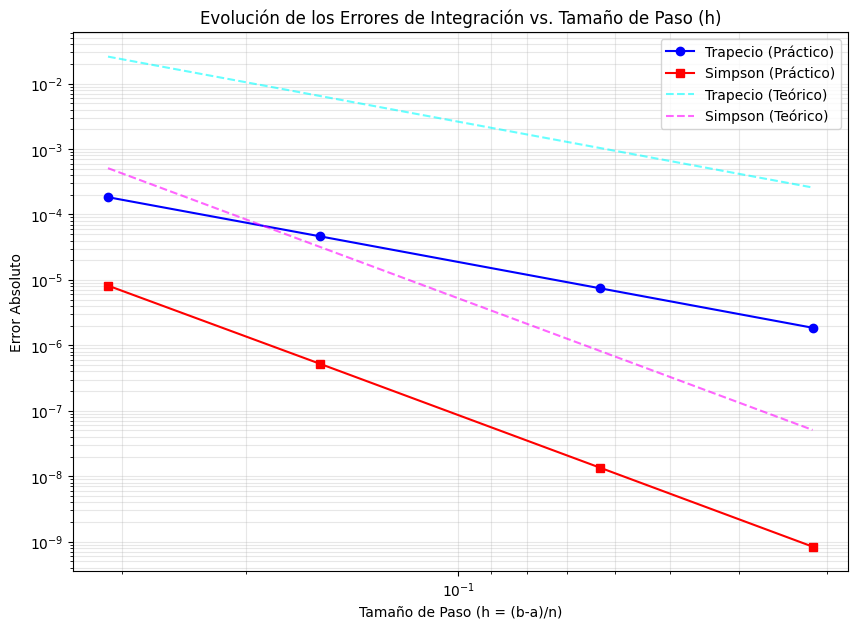

In [47]:
plt.figure(figsize=(10, 7))
plt.loglog(h_values, err_p_t_list, 'o-', color='blue', label='Trapecio (Práctico)')
plt.loglog(h_values, err_p_s_list, 's-', color='red', label='Simpson (Práctico)')
plt.loglog(h_values, err_t_t_list, '--', color='cyan', alpha=0.6, label='Trapecio (Teórico)')
plt.loglog(h_values, err_t_s_list, '--', color='magenta', alpha=0.6, label='Simpson (Teórico)')
plt.title('Evolución de los Errores de Integración vs. Tamaño de Paso (h)')
plt.xlabel('Tamaño de Paso (h = (b-a)/n)')
plt.ylabel('Error Absoluto')
plt.grid(True, which="both", ls="-", alpha=0.3)
plt.legend()
plt.gca().invert_xaxis() # Es común invertir el eje x para que h decrezca de izquierda a derecha
plt.show()

**Conclusión:**


Los resultados confirman que el Error Teórico es una cota superior válida y confiable, ya que en todas las pruebas el Error Práctico resultó ser menor ($E_{práctico} < E_{teórico}$). Esto demuestra que las fórmulas basadas en el máximo de las derivadas ($M_2$ y $M_4$) predicen con seguridad el límite del error. 

La gráfica y la tabla demuestran la diferencia en la eficiencia de cada método al reducir el tamaño de paso $h$:

Trapecio: Presenta un orden $O(h^2)$. Al aumentar $n$ diez veces (de 10 a 100), el error se redujo aproximadamente 100 veces.

Simpson: Presenta un orden $O(h^4)$. Al aumentar $n$ diez veces, el error disminuyó drásticamente (casi 10,000 veces)

A pesar de que la integral no tiene una solución analítica simple, ambos métodos convergieron de forma estable al mismo valor referencial ($1.251208173$). 

## Ejercicio 2

2.- Comparar los tiempos de ejecución de los 4 algoritmos: trapecio, simpson, newton-cotes simple y compuesto para aproximar la integral:

$$
\int_0^1 \frac{ln(1+x)}{x^2+1}dx \approx 0.2721982...
$$

y dar conclusiones.

Compararemos la eficiencia computacional de cuatro métodos:
1. **Trapecio Simple**
2. **Simpson Simple**
3. **Trapecio Compuesto** (usando un $n$ moderado, ej. $n=1000$)
4. **Simpson Compuesto** (usando un $n$ moderado, ej. $n=1000$)

**Nota 1:** Dado que el tiempo de ejecución de una sola llamada es extremadamente pequeño, ejecutaremos cada algoritmo 10,000 veces para obtener un promedio estable.

**Nota 2:** Recordar que las reglas de trapecio y Simpson coinciden con las formulas de Newton-Cotes para n = 1,2.

In [48]:
def simple_trapezoid(f, a, b):
    return ((b - a) / 2) * (f(a) + f(b))

def simple_simpson(f, a, b):
    # Simpson requiere el punto medio también
    c = (a + b) / 2
    h = (b - a) / 2
    return (h / 3) * (f(a) + 4*f(c) + f(b))

In [49]:
import time
import numpy as np

# 1. Definición de la nueva función
def f2(x):
    return np.log(1 + x) / (x**2 + 1)

a2, b2 = 0, 1
n_comp = 1000 # Número de subintervalos para las versiones compuestas
iteraciones = 10000 # Repeticiones para promediar el tiempo

# Diccionario para almacenar resultados
tiempos = {}
resultados_val = {}

I_exact, _ = quad(f2, a2, b2, epsabs=1e-14)

def medir_tiempo(nombre, func, *args):
    start = time.perf_counter()
    for _ in range(iteraciones):
        res = func(*args)
    end = time.perf_counter()
    tiempos[nombre] = (end - start) / iteraciones
    resultados_val[nombre] = res

# 2. Mediciones
# Usamos las funciones que ya tienes programadas
medir_tiempo("Trapecio Simple", simple_trapezoid, f2, a2, b2)
medir_tiempo("Simpson Simple", simple_simpson, f2, a2, b2)
medir_tiempo("Trapecio Compuesto", composite_trapezoid, f2, a2, b2, n_comp)
medir_tiempo("Simpson Compuesto", composite_simpson, f2, a2, b2, n_comp)

# # 3. Mostrar Resultados
# print(f"| Método | Resultado Aproximado | Tiempo Promedio (s) |")
# print(f"|---|---|---|")
# for m in tiempos:
#     print(f"| {m:<18} | {resultados_val[m]:.10f} | {tiempos[m]:.2e} |")

# print(I_exact)

Los resultados fueron los siguientes:

| Método | Resultado Aproximado | Tiempo Promedio (s) |
|---|---|---|
| Trapecio Simple    | 0.1732867951 | 1.72e-06 |
| Simpson Simple     | 0.2740103227 | 2.45e-06 |
| Trapecio Compuesto | 0.2721981699 | 1.27e-05 |
| Simpson Compuesto  | 0.2721982613 | 1.45e-05 |


**Conclusiones:**

Existe una diferencia clara de escala temporal entre los métodos. Las reglas Simples son aproximadamente 7 a 8 veces más rápidas que las Compuestas ($1.72\mu s$ vs $12.7\mu s$).

A pesar de su rapidez, el Trapecio Simple entrega un resultado ($0.1732$) muy alejado del valor de consenso ($0.2721$), lo que lo hace inútil para aplicaciones que requieran mínima exactitud.

Los resultados demuestran que, en la práctica, no vale la pena ahorrar tiempo usando reglas simples si se busca un resultado confiable. Dado que incluso el método más lento (Simpson Compuesto) tarda apenas 0.014 milisegundos, el costo computacional es insignificante para el hardware moderno, lo que justifica el uso sistemático de métodos compuestos o adaptativos.

## Ejercicio 3:

3.- Usar las formulas de Euler implicita y explicita para resolver la edo

$$
y{'}(x) + y(x) = sen(x)
$$

$$
y(0)=0
$$

$$
\forall x \in (0,1)
$$

Comparar con la solucion exacta, para $n=10,50,80$.

#### 3. Resolución de EDO: Euler Explícito e Implícito

Dada la EDO:
$$y'(x) = \sin(x) - y(x), \quad y(0)=0$$

##### Solución Exacta
Utilizando el método del factor integrante, la solución analítica es:
$$y(x) = \frac{1}{2}(e^{-x} + \sin(x) - \cos(x))$$

##### Métodos Numéricos
Definimos $h = \frac{b-a}{n}$ y $x_{i+1} = x_i + h$:

1. **Euler Explícito (Hacia adelante):**
   $$y_{i+1} = y_i + h f(x_i, y_i)$$
   $$y_{i+1} = y_i + h (\sin(x_i) - y_i)$$

2. **Euler Implícito (Hacia atrás):**
   $$y_{i+1} = y_i + h f(x_{i+1}, y_{i+1})$$
   $$y_{i+1} = y_i + h (\sin(x_{i+1}) - y_{i+1})$$
   Despejando $y_{i+1}$ (ya que es una EDO lineal):
   $$y_{i+1}(1+h) = y_i + h \sin(x_{i+1})$$
   $$y_{i+1} = \frac{y_i + h \sin(x_{i+1})}{1+h}$$

n=10 | Error Explícito: 1.43304e-02 | Error Implícito: 1.27743e-02
n=50 | Error Explícito: 2.73289e-03 | Error Implícito: 2.67084e-03
n=80 | Error Explícito: 1.70065e-03 | Error Implícito: 1.67641e-03


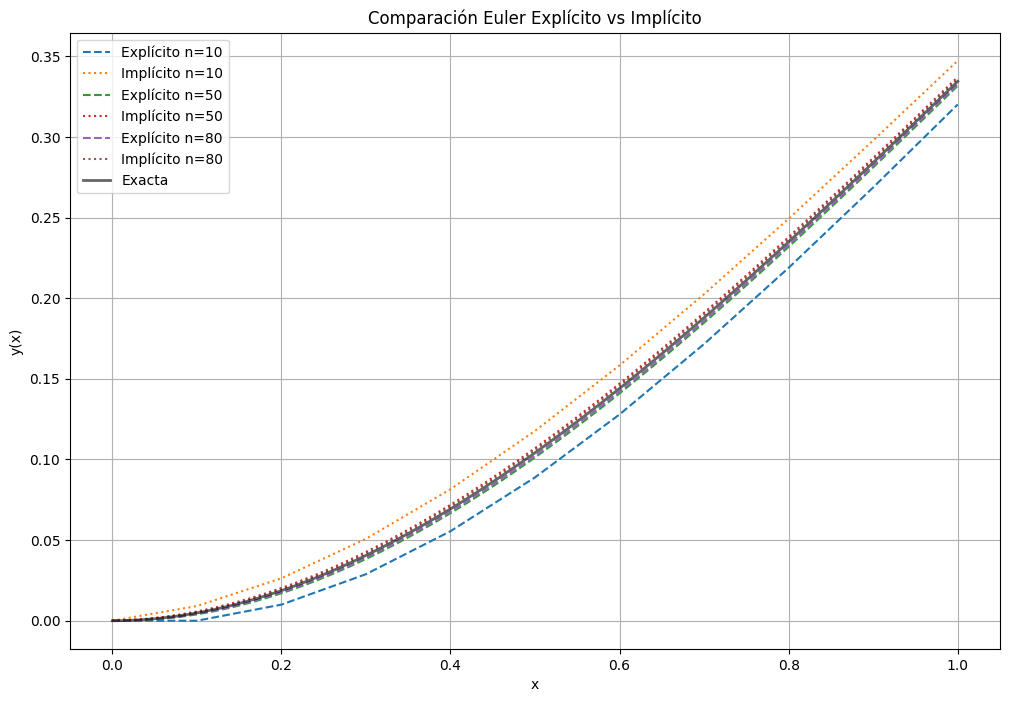

In [ ]:
# 1. Definición de la solución exacta
def y_exacta(x):
    return 0.5 * (np.exp(-x) + np.sin(x) - np.cos(x))

# 2. Parámetros del problema
a, b = 0, 1
y0 = 0
ns = [10, 50, 80]

def resolver_edo(n):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    
    # Arreglos para soluciones
    y_exp = np.zeros(n + 1)
    y_imp = np.zeros(n + 1)
    
    # Condiciones iniciales
    y_exp[0] = y0
    y_imp[0] = y0
    
    for i in range(n):
        # Euler Explícito
        y_exp[i+1] = y_exp[i] + h * (np.sin(x[i]) - y_exp[i])
        
        # Euler Implícito (Fórmula despejada)
        y_imp[i+1] = (y_imp[i] + h * np.sin(x[i+1])) / (1 + h)
        
    return x, y_exp, y_imp


plt.figure(figsize=(12, 8))
for n in ns:
    x_vals, ye, yi = resolver_edo(n)
    
    # Calcular errores finales
    err_e = abs(ye[-1] - y_exacta(1))
    err_i = abs(yi[-1] - y_exacta(1))
    
    print(f"n={n:2d} | Error Explícito: {err_e:.5e} | Error Implícito: {err_i:.5e}")
    
    plt.plot(x_vals, ye, '--', label=f'Explícito n={n}')
    plt.plot(x_vals, yi, ':', label=f'Implícito n={n}')


x_fine = np.linspace(a, b, 200)
plt.plot(x_fine, y_exacta(x_fine), 'k', lw=2, label='Exacta', alpha=0.6)

plt.title('Comparación Euler Explícito vs Implícito')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()
plt.grid(True)
plt.show()

**Conclusiones:**

Se observa claramente que a medida que $n$ aumenta (de 10 a 80), tanto el método explícito como el implícito se aproximan significativamente a la solución exacta (línea gris sólida). Esto confirma que ambos métodos son consistentes, ya que el error global disminuye al reducir el tamaño del paso $h$.

El método de Euler Explícito (líneas discontinuas) tiende a aproximar la solución por debajo del valor exacto en este intervalo. Esto ocurre porque utiliza la pendiente al inicio del subintervalo, la cual, para esta función convexa, es menor que la pendiente real media del tramo.

El método de Euler Implícito (líneas punteadas) aproxima la solución por encima del valor exacto. Al utilizar la pendiente al final del subintervalo ($x_{i+1}$), sobreestima el crecimiento de la función en regiones de aceleración positiva.

Dado que la solución exacta crece de forma suave y monótona en el intervalo $[0, 1]$, no se aprecian problemas de estabilidad numérica (oscilaciones o divergencia) en el método explícito, lo que sugiere que el paso elegido está dentro de la región de estabilidad del método para esta ecuación diferencial.